In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

import simtk.openmm as mm
import simtk.unit as unit
import simtk.openmm.app as app

In [3]:
# Matplotlib options
%matplotlib inline
matplotlib.style.use('ggplot')
pylab.rcParams['figure.figsize'] = 12, 8

In [4]:
for ii in range(mm.Platform.getNumPlatforms()):
    print(mm.Platform.getPlatform(ii).getName())

Reference
CPU
OpenCL


In [5]:
kB = unit.BOLTZMANN_CONSTANT_kB * unit.AVOGADRO_CONSTANT_NA

K = 100.0 * unit.kilocalories_per_mole/unit.angstrom**2
mass = (12.010*15.999)/(12.010+15.999) * unit.amu # C-O atoms

In [6]:
step_size       = 0.001*unit.picoseconds
num_steps       = 30000
saving_period   = 100
temperature = 300*unit.kelvin
friction    = 1.0/unit.picosecond
platform_name='CPU'  #platform:     A platform (CPU, OpenCL, CUDA, or reference); default is platform=OpenCL"

initial_positions = unit.Quantity(np.zeros([1,3], np.float32), unit.angstroms)

"""
T = sqrt(m/K)
timestep smaller than ~ T/10
standard deviation in each dimension sigma= (kT / K)^(1/2)
Expectation and standard deviation of the potential energy of a 3D harmonic oscillator is (3/2)kT
"""

In [7]:
num_checks     = int(num_steps/saving_period)
times      = unit.Quantity(np.zeros([num_checks], np.float32), unit.picoseconds)
positions  = unit.Quantity(np.zeros([num_checks,3], np.float32), unit.angstroms)
velocities = unit.Quantity(np.zeros([num_checks,3], np.float32), unit.angstroms/unit.picosecond)
potential_energies   = unit.Quantity(np.zeros([num_checks], np.float32), unit.kilocalories_per_mole)
kinetic_energies     = unit.Quantity(np.zeros([num_checks], np.float32), unit.kilocalories_per_mole)

In [8]:
system = mm.System()
system.addParticle(mass)

force = mm.CustomExternalForce('(K/2.0) * (x^2 + y^2 + z^2)')

In [9]:
force.addGlobalParameter('K', K)
force.addParticle(0, [])
system.addForce(force)

0

In [10]:
integrator = mm.LangevinIntegrator(temperature, friction, step_size)
platform = mm.Platform.getPlatformByName(platform_name)


In [11]:
context = mm.Context(system, integrator, platform)
context.setPositions(initial_positions)
context.setVelocitiesToTemperature(temperature)

In [12]:
state = context.getState(getEnergy=True, getPositions=True, getVelocities=True)
times[0] = state.getTime()
positions[0] = state.getPositions()[0]
velocities[0] = state.getVelocities()[0]
kinetic_energies[0]=state.getKineticEnergy()
potential_energies[0]=state.getPotentialEnergy()

In [13]:
for ii in range(num_checks):

    context.getIntegrator().step(saving_period)
    state = context.getState(getEnergy=True, getPositions=True, getVelocities=True)
    times[ii] = state.getTime()
    positions[ii] = state.getPositions()[0]
    velocities[ii] = state.getVelocities()[0]
    kinetic_energies[ii]=state.getKineticEnergy()
    potential_energies[ii]=state.getPotentialEnergy()



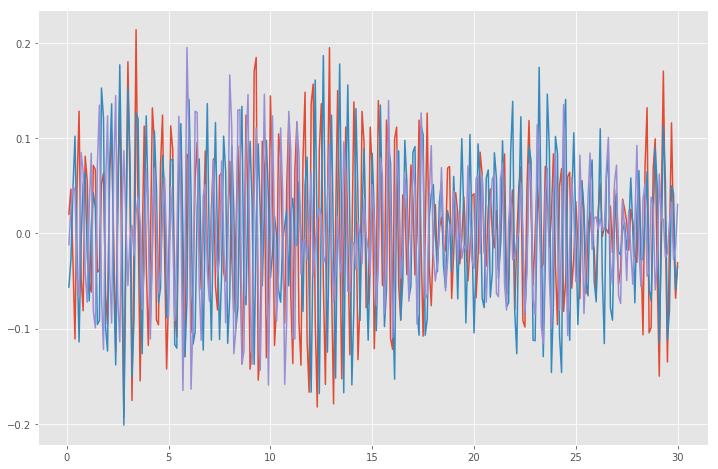

In [14]:
plt.plot(times,positions)

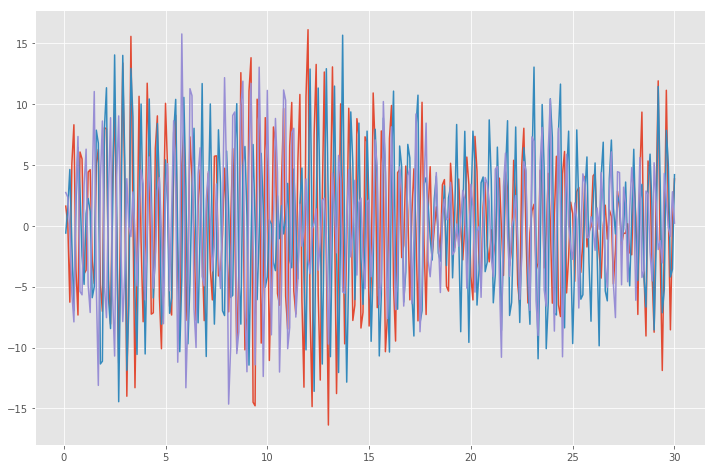

In [15]:
plt.plot(times,velocities)

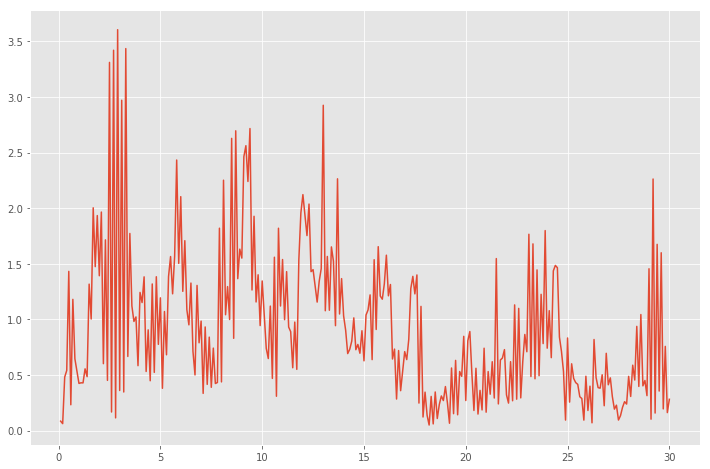

In [16]:
plt.plot(times,kinetic_energies)

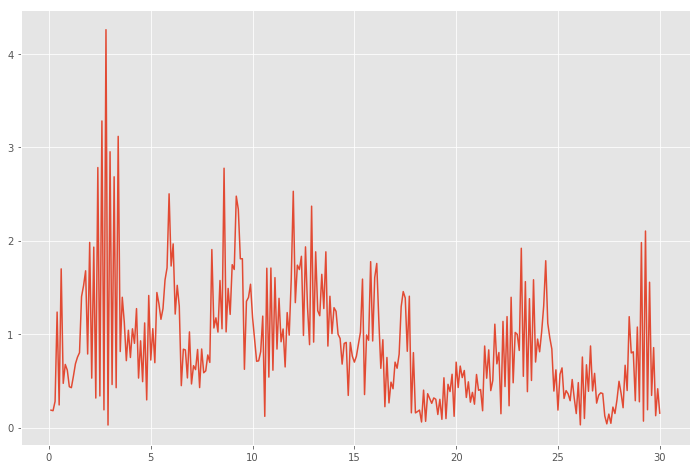

In [17]:
plt.plot(times,potential_energies)